## Problem:

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



### Solution

#### I defined both Polynomial and AR Model for each of the columns from the dataset. Green dots represent the AR Model and the red dots represent the Polynomial Model.
#### And I would prefer the Polynomial Model or AR Model depending on my data. Because if the data is regular, AR Model gives more accurate results. On the other hand if the data is fluctuating or some part of the data is missing, Polynomial Model gives more accurate results.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

df_arac = pd.read_csv(u'data/arac.csv',sep=';')

## 01. Polynomial and AR Model For All Vehicles

Polynomial Model
[[ 20.08634605]
 [ 20.98194705]
 [ 21.89755951]
 [ 22.83318344]
 [ 23.78881884]]

AR Model
[[ 21.102748]
 [ 22.398372]
 [ 23.773542]
 [ 25.233142]
 [ 26.782356]]


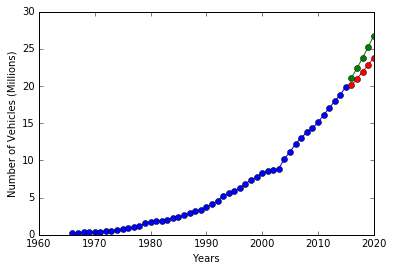

In [57]:
# Polynomial Model for All Vehicles
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.All).T / 1000000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Vehicles (Millions)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for All Vehicles
y2 = np.matrix(df_arac.All[1:]).T
A3 = np.matrix(df_arac.All[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.matrix([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000000)

plt.plot(TargetYear, f2 / 1000000, 'go-')
plt.show()

## 02. Polynomial and AR Model For Cars

Polynomial Model
[[ 10.40481153]
 [ 10.87924341]
 [ 11.36444102]
 [ 11.86040435]
 [ 12.36713341]]

AR Model
[[ 11.203217]
 [ 11.943   ]
 [ 12.731633]
 [ 13.572342]
 [ 14.468565]]


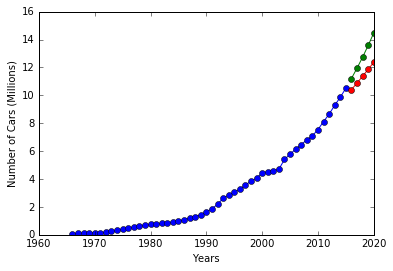

In [58]:
# Polynomial Model for Cars
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.Car).T / 1000000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Cars (Millions)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Cars
y2 = np.matrix(df_arac.Car[1:]).T
A3 = np.matrix(df_arac.Car[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.matrix([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000000)

plt.plot(TargetYear, f2 / 1000000, 'go-')
plt.show()

## 03. Polynomial and AR Model For Minibuses

Polynomial Model
[[ 483.84034099]
 [ 502.09693153]
 [ 520.7029608 ]
 [ 539.6584288 ]
 [ 558.96333553]]

AR Model
[[ 465.835]
 [ 485.657]
 [ 506.323]
 [ 527.868]
 [ 550.33 ]]


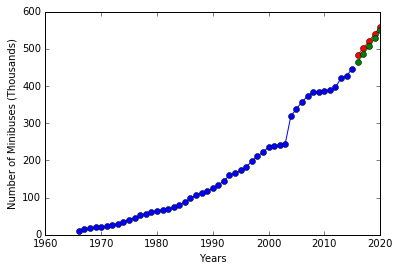

In [59]:
# Polynomial Model for Minibuses
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.Minibus).T / 1000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Minibuses (Thousands)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Minibuses
y2 = np.matrix(df_arac.Minibus[1:]).T
A3 = np.matrix(df_arac.Minibus[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.matrix([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000)

plt.plot(TargetYear, f2 / 1000, 'go-')
plt.show()

## 04. Polynomial and AR Model For Buses

Polynomial Model
[[ 252.91263706]
 [ 262.7822212 ]
 [ 272.8524972 ]
 [ 283.12346505]
 [ 293.59512475]]

AR Model
[[ 224.461]
 [ 232.644]
 [ 241.125]
 [ 249.915]
 [ 259.026]]


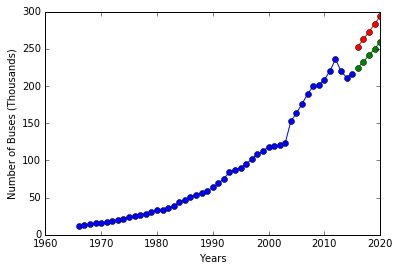

In [60]:
# Polynomial Model for Buses
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.Bus).T / 1000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Buses (Thousands)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Buses
y2 = np.matrix(df_arac.Bus[1:]).T
A3 = np.matrix(df_arac.Bus[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.matrix([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000)

plt.plot(TargetYear, f2 / 1000, 'go-')
plt.show()

## 05. Polynomial and AR Model For Small Trucks

Polynomial Model
[[ 3.26230509]
 [ 3.44393108]
 [ 3.6304001 ]
 [ 3.82171214]
 [ 4.01786722]]

AR Model
[[ 3.48994 ]
 [ 3.764617]
 [ 4.060913]
 [ 4.380529]
 [ 4.7253  ]]


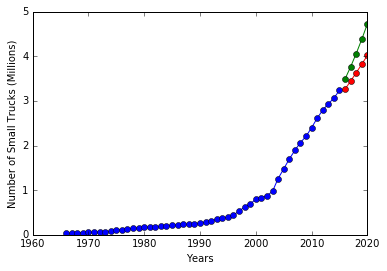

In [61]:
# Polynomial Model for Small Trucks
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.SmallTruck).T / 1000000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Small Trucks (Millions)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Small Trucks
y2 = np.matrix(df_arac.SmallTruck[1:]).T
A3 = np.matrix(df_arac.SmallTruck[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.matrix([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000000)

plt.plot(TargetYear, f2 / 1000000, 'go-')
plt.show()

## 06. Polynomial and AR Model For Trucks

Polynomial Model
[[ 0.88618509]
 [ 0.91870462]
 [ 0.95186043]
 [ 0.98565249]
 [ 1.02008082]]

AR Model
[[ 0.831361]
 [ 0.861136]
 [ 0.891978]
 [ 0.923924]
 [ 0.957014]]


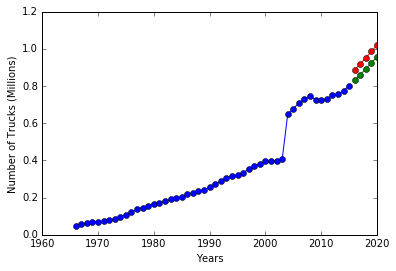

In [62]:
# Polynomial Model for Trucks
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.Truck).T / 1000000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Trucks (Millions)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Trucks
y2 = np.matrix(df_arac.Truck[1:]).T
A3 = np.matrix(df_arac.Truck[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.matrix([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000000)

plt.plot(TargetYear, f2 / 1000000, 'go-')
plt.show()

## 07. Polynomial and AR Model For Motorcycles

Polynomial Model
[[ 3.07044836]
 [ 3.21851027]
 [ 3.37010876]
 [ 3.52524384]
 [ 3.68391551]]

AR Model
[[ 3.11872 ]
 [ 3.309631]
 [ 3.512229]
 [ 3.727229]
 [ 3.95539 ]]


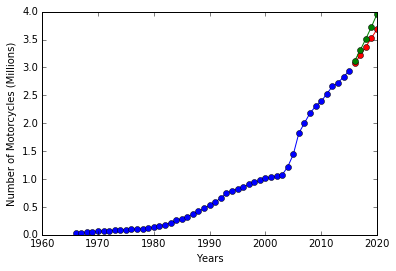

In [63]:
# Polynomial Model for Motorcycles
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.Motorcycle).T / 1000000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Motorcycles (Millions)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2* w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Motorcycles
y2 = np.matrix(df_arac.Motorcycle[1:]).T
A3 = np.matrix(df_arac.Motorcycle[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.mat([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000000)

plt.plot(TargetYear, f2 / 1000000, 'go-')

plt.show()

## 08. Polynomial and AR Model For Special Vehicles

Polynomial Model
[[ 50.73522612]
 [ 51.69836519]
 [ 52.66150425]
 [ 53.62464331]
 [ 54.58778238]]

AR Model
[[ 45.494]
 [ 45.853]
 [ 46.215]
 [ 46.58 ]
 [ 46.948]]


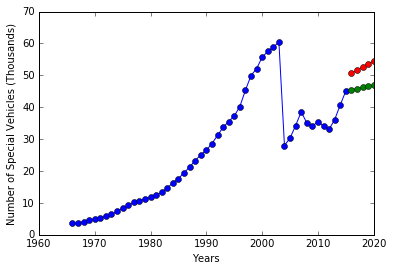

In [64]:
# Polynomial Model for Special Vehicles
x = np.matrix(df_arac.Year).T
y = np.matrix(df_arac.SpecialVehicles).T / 1000

# Setup the vandermonde matrix for year values
degree = 1
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Special Vehicles (Thousands)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Special Vehicles
y2 = np.matrix(df_arac.SpecialVehicles[1:]).T
A3 = np.matrix(df_arac.SpecialVehicles[:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.mat([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000)

plt.plot(TargetYear, f2 / 1000, 'go-')
plt.show()

## 09. Polynomial and AR Model For Machinery

Polynomial Model
[[ 255.60024787]
 [ 265.47630378]
 [ 275.54072336]
 [ 285.79350659]
 [ 296.23465349]]

AR Model
[[ 145.967]
 [ 154.469]
 [ 163.466]
 [ 172.987]
 [ 183.063]]


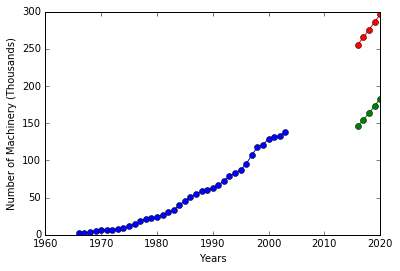

In [65]:
# Polynomial Model for Machinery
x = np.matrix(df_arac.Year[0:38]).T
y = np.matrix(df_arac.Machinery[0:38]).T / 1000

# Setup the vandermonde matrix for year values
degree = 2
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Machinery (Thousands)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Machinery
y2 = np.matrix(df_arac.Machinery[1:38]).T
A3 = np.matrix(df_arac.Machinery[:37]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.mat([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000)

plt.plot(TargetYear, f2 / 1000, 'o-')
plt.show()

## 10. Polynomial and AR Model For Tractors

Polynomial Model
[[ 1.68367252]
 [ 1.72021749]
 [ 1.75676245]
 [ 1.79330742]
 [ 1.82985239]]

AR Model
[[ 1.745228]
 [ 1.804883]
 [ 1.866577]
 [ 1.93038 ]
 [ 1.996364]]


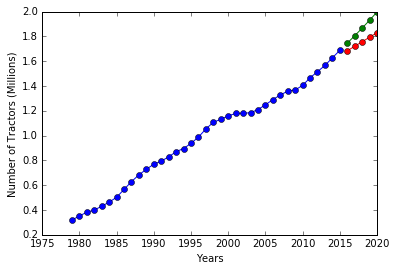

In [66]:
# Polynomial Model for Tractors
x = np.matrix(df_arac.Year[13:]).T
y = np.matrix(df_arac.Tractor[13:]).T / 1000000

# Setup the vandermonde matrix for year values
degree = 1
A = np.hstack(np.power(x, i) for i in range(degree + 1))

# Find the w* matrix
w_ls, E, rank, sigma = np.linalg.lstsq(A, y)

plt.plot(x, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Tractors (Millions)')

# Prediction
TargetYear = np.matrix([2016, 2017, 2018, 2019, 2020]).T
A2 = np.hstack(np.power(TargetYear, i) for i in range(degree + 1))
f = A2 * w_ls

print("Polynomial Model")
print(f)
plt.plot(TargetYear, f, 'ro-')

# AR Model for Tractors
y2 = np.matrix(df_arac.Tractor[15:]).T
A3 = np.matrix(df_arac.Tractor[14:-1]).T

w_ls, E, rank, sigma = np.linalg.lstsq(A3, y2)

f2 = np.mat([2016, 2017, 2018, 2019, 2020]).T
f2[0] = y2[-1] * w_ls;

for i in range(len(f2) - 1):
    f2[i+1] = f2[i] * w_ls

print("\nAR Model")
print(f2 / 1000000)

plt.plot(TargetYear, f2 / 1000000, 'go-')
plt.show()